<a href="https://colab.research.google.com/github/IvanWasNotAvailable/StockPricePrediction/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

In [1]:
# To get started, we need to ensure that the absolute latest version of Tweepy is 
# fully installed and overwrites any preexisting installations.

!pip install git+https://github.com/tweepy/tweepy.git --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-ju243awo
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-ju243awo
     |████████████████████████████████| 62 kB 374 kB/s 
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=102891 sha256=046180132e064434a90b36bc5bb79ce5d8a99cf9fd02df9fbe792cf119f1e48a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_vvspmis/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
# Import the tweepy package
import tweepy

# Import a variety of other packages that may be useful for working with data.
import pandas as pd
import json
import time

# 1. Authentification

In order for our code and commands to effectively communicate with the Twitter API, we need to "authenticate" our credentials with the services.

In [113]:
# Before getting started with any code, we created an Twitter Developer account
# The various needed keys, secrets, and tokens are stored in variables 

#TO BE ABLE TO RUN THIS CODE WE PASTE OUR PRIVATE TWITTER API KEYS
my_consumer_key = "..."
my_consumer_secret = "..."

my_access_token = "..."
my_access_secret = "..."

my_bearer_token = "..."

In [4]:
# Using the tweepy.Client(...) function, you can establish a connection to the 
# Twitter API.  The example below shows a robust way of creating a "client" object
# by passing our credentials to appropriate parameters.

# Additionally, the "wait_on_rate_limit" parameter is set to True at this stage.
# This will be explained more later, but this helps to overcome a lot of errors
# associated with API usage limitations.

client = tweepy.Client(
    wait_on_rate_limit = True,
    consumer_key = my_consumer_key,
    consumer_secret = my_consumer_secret,
    access_token = my_access_token,
    access_token_secret = my_access_secret,
    bearer_token = my_bearer_token,
)

In [5]:
# Test to make sure the client object exists

client

In [6]:
# Do a quick test to make sure the client is working.  You should see a 
# "Response(..." object of some form displayed in the output if successful 
# (don't worry about the details, we will cover everything together)

client.get_user(username ="elonmusk")

Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})

# 2.1 Getting Started - User Lookup

##2.1.1 Single User

In [7]:
#The following example uses our client object and the get_user(...) function to search for a specific 
# Twitter user's account by username.  The user_single object will be used to store the information returned to us.

# We'll starting by looking at the Twitter account for the new Twitter CEO, Elon Musk: https://twitter.com/elonmusk

user_single = client.get_user(
    username ="elonmusk",
)

In [8]:
user_single

Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})

In [9]:
user_single.data

<User id=44196397 name=Elon Musk username=elonmusk>

In [10]:
user_single.data.name

'Elon Musk'

In [11]:
# Unintuitively, there is a "data" attribute within the "data" component 
# within the user_single object.  What's important is that this will give
# us ALL of the data delivered by the Twitter API.

# This information is structured as a dictionary and can be treated as a JSON 
# object when it is helpful.

user_single.data.data

{'id': '44196397', 'name': 'Elon Musk', 'username': 'elonmusk'}

In [12]:
# This information can also be accessed as key-value pairs using [...].

# These approaches to isolating individual data may be useful if you need 
# granular control individual datum values.

user_single.data.data["username"]

'elonmusk'

In [13]:
# Another more practical solution is to convert the data in a Pandas Dataframe

pd.json_normalize( user_single.data.data, sep="_" )

,id,name,username
0,44196397,Elon Musk,elonmusk


In [14]:
# "Fields" refer to the additional data you want to request from the Twitter 
# API.  There are very precise options available for "user fields", "tweet 
# fields", "media fields" and other "....fields" options.  Using these tools 
# robustly requires close reading of the documentation.

# Twitter API (get_user) - https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference/get-users-by-username-username
# Twitter API (Fields) - https://developer.twitter.com/en/docs/twitter-api/fields
# Tweepy - https://docs.tweepy.org/en/latest/client.html#user-fields

# Based on information drawn from the documentation, the example below adds
# the user_fields=... parameter and a list[...] of desired fields.

user_single = client.get_user(
    username ="elonmusk",
    user_fields = ["created_at", "description","public_metrics","verified",],
)

In [15]:
# Convert data to Pandas DataFrame format.

pd.json_normalize( user_single.data.data, sep="_" )

,verified,username,description,name,id,created_at,public_metrics_followers_count,public_metrics_following_count,public_metrics_tweet_count,public_metrics_listed_count
0,True,elonmusk,,Elon Musk,44196397,2009-06-02T20:12:29.000Z,120509276,139,21085,104856


##2.1.2 User Group

In [51]:
users_group = client.get_users(
    usernames =["elonmusk","JeffBezos","richardbranson","BarackObama",],
    user_fields = ["created_at", "description","public_metrics","verified",],
)

In [52]:
#Each item can be accessed in the same way you index and select items from other lists.

users_group.data[1].data["username"]

'JeffBezos'

In [53]:
# Create empty dataframe
data_users = pd.DataFrame()

# Iterate through users_group and append data to the data_users dataframe
for i in users_group.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  data_users = data_users.append( temp_data , ignore_index=True )

In [54]:
# Inspect the dataframe

data_users

,created_at,description,username,verified,name,id,public_metrics_followers_count,public_metrics_following_count,public_metrics_tweet_count,public_metrics_listed_count
0,2009-06-02T20:12:29.000Z,,elonmusk,True,Elon Musk,44196397,120510961,139,21085,104859
1,2008-07-20T22:38:36.000Z,Amazon. Blue Origin. Washington Post. Bezos Ea...,JeffBezos,True,Jeff Bezos,15506669,5954656,120,381,11340
2,2007-08-13T15:20:18.000Z,"Tie-loathing adventurer, philanthropist & trou...",richardbranson,True,Richard Branson,8161232,12622196,979,26642,44333
3,2007-03-05T22:08:25.000Z,"Dad, husband, President, citizen.",BarackObama,True,Barack Obama,813286,133261701,568068,16718,218740


# 2.2 Getting Started - Followers

In addition to looking up individual users' information, the Twitter API also enables us to harvest lists of friends, followers, and the timeline (tweets, retweets, etc...) of selected Twitter users.

In [55]:
# Let's look at data from BASF: https://twitter.com/basf

basf = client.get_user(
    username = "BASF",
    user_fields = ["created_at", "description","public_metrics","verified",],
)

In [56]:
# In order to user subsequent functions, we need to switch from relying on the 
# Twitter username to instead using the Twitter id

basf.data.id

164641631

In [57]:
# Using the get_users_following(...) function, you can retrieve the Twitter user 
# account details for up to 1000 Twitter users who BASF's Twitter account is following.

basf_following = client.get_users_following(
    id = basf.data.id ,
    user_fields = ["created_at", "description","public_metrics","verified",],
    max_results = 10)

In [58]:
# Inspect the resulting list of data

basf_following.data

[<User id=260771406 name=KfW Bankengruppe username=KfW>,
 <User id=1463093520953065472 name=Manasvita S username=ManasvitaS>,
 <User id=1437363947129249793 name=Spark Paid Social username=SparkPaidSocial>,
 <User id=5120691 name=World Economic Forum username=wef>,
 <User id=1384777491970150400 name=QUTAC username=qutac_de>,
 <User id=960421214 name=Hanna Løyche username=hannaloyche>,
 <User id=2900791972 name=Nina Schwab-Hautzinger username=schwab_nina>,
 <User id=1364378809 name=Robert Koch-Institut username=rki_de>,
 <User id=927076961503076352 name=Adaptation Exchange by the NWP username=AdaptXChange>,
 <User id=1146329871418843136 name=Ursula von der Leyen username=vonderleyen>]

In [59]:
# Using the same approach as before, construct a Pandas DataFrame using the collected data.

basf_following_df = pd.DataFrame()

for i in basf_following.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  basf_following_df = basf_following_df.append(temp_data,ignore_index=True)

In [60]:
# Inspect the dataframe

basf_following_df

,verified,name,description,username,created_at,id,public_metrics_followers_count,public_metrics_following_count,public_metrics_tweet_count,public_metrics_listed_count
0,False,KfW Bankengruppe,Hier twittert die Konzernkommunikation der KfW...,KfW,2011-03-04T15:26:53.000Z,260771406,22671,39,15340,397
1,False,Manasvita S,Digital Marketing Manager at @SpicetreeAgency,ManasvitaS,2021-11-23T10:34:36.000Z,1463093520953065472,5,10,1,0
2,False,Spark Paid Social,Paid Social team at Spark Foundry,SparkPaidSocial,2021-09-13T10:36:52.000Z,1437363947129249793,4,2,1,0
3,True,World Economic Forum,The international organization for public priv...,wef,2007-04-18T14:00:19.000Z,5120691,4290085,919,172836,27783
4,False,QUTAC,In the Quantum Technology and Application Cons...,qutac_de,2021-04-21T07:54:34.000Z,1384777491970150400,80,27,53,2
5,False,Hanna Løyche,My tweets are my personal views and thoughts -...,hannaloyche,2012-11-20T12:50:16.000Z,960421214,400,649,1834,17
6,False,Nina Schwab-Hautzinger,,schwab_nina,2014-12-01T16:17:02.000Z,2900791972,155,307,65,1
7,True,Robert Koch-Institut,Informationen und Hintergründe aus dem nationa...,rki_de,2013-04-19T13:04:34.000Z,1364378809,601099,137,4515,2081
8,False,Adaptation Exchange by the NWP,Twitter account by the Nairobi Work Programme ...,AdaptXChange,2017-11-05T07:35:46.000Z,927076961503076352,4291,1968,8478,56
9,True,Ursula von der Leyen,President of the @EU_Commission. Mother of sev...,vonderleyen,2019-07-03T08:08:33.000Z,1146329871418843136,1387790,232,3893,6500


In [61]:
# Conversely, you can collect the user accounts of Twitter users who are following BASF's account.
# Also here is the limit 1000.

basf_followers = client.get_users_followers(
    id = basf.data.id ,
    user_fields = ["created_at", "description","public_metrics","verified",],
    max_results = 10)

In [62]:
# Construct a Pandas DataFrame using the collected data.

basf_followers_df = pd.DataFrame()

for i in basf_followers.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  basf_followers_df = basf_followers_df.append(temp_data,ignore_index=True)

In [63]:
# Inspect the dataframe

basf_followers_df

,id,name,verified,username,created_at,description,public_metrics_followers_count,public_metrics_following_count,public_metrics_tweet_count,public_metrics_listed_count
0,876104744028262400,Phelix ™💨,False,IamPhelixOtieno,2017-06-17T15:50:23.000Z,😍😘😍😘😐😘😍,528,1155,1129,0
1,1528789144973070337,Carlito,False,BizCry,2022-05-23T17:25:23.000Z,Bi bu kadar daha yok..,1,2,0,0
2,1600564349554278407,Adam Phillips,False,AdamPhi11036238,2022-12-07T18:54:50.000Z,,3,107,0,0
3,1447946801030574080,Vipin Kumar,False,KumarVipindudi,2021-10-12T15:26:50.000Z,MS student (Weed Science)!!! Graduate Research...,440,523,154,0
4,1567153037054967810,Lawrence,False,LawrenceBongs,2022-09-06T14:10:03.000Z,,87,369,18,1
5,3345455188,Johan A. Stenberg 🍓,False,Stenberg_JA,2015-06-25T12:12:52.000Z,Natural scientist™ | Biology Professor @_SLU |...,1884,1910,1661,19
6,1312302642132025346,Reda Aleid,False,AleidReda,2020-10-03T08:05:51.000Z,#KFUPM CHE,3,296,3,0
7,4465547898,Rory Bosma,False,RoryBosma,2015-12-05T16:14:11.000Z,Sustainable solutions for business that use wa...,89,517,122,0
8,1588806375181795328,@NenaPrincess1,False,Princess110Nena,2022-11-05T08:12:36.000Z,Dm for promotion,21,186,22,0
9,1598563136373760001,ocean integrity,False,IntegrityOcean1,2022-12-02T06:22:22.000Z,,57,1480,7,0


We could now look at Twitter timelines of specified users using the get_users_tweets(...) function. For this project we will skip that and focus on tweets made "about" a user. We start with that in the next Getting Started Section.

#2.3 Getting Started - Search and API

Separate from looking up known accounts and connected information, one of the most powerful facets of the Twitter API is the ability to conduct robust and complicated searches for tweets from all across the platform.

In [83]:
# To get started, you can use the search_recent_tweets(...) function and the 
# only parameter that must be specified is the query=... field.

search = client.search_recent_tweets(
    query = "BASF",
    max_results = 100,
)

In [77]:
# Inspect one tweet

search.data[5].data

{'edit_history_tweet_ids': ['1600948256426831872'],
 'id': '1600948256426831872',
 'text': 'BASF uzvaras gājiens Latvijas skolās var sākties!\n\n@IZM_gov_lv @visc_gov_lv var minēt 3x, kas šeit problemātiski! https://t.co/z8JSWcGplY'}

In [ ]:
# The query=... parameter can take very precise search requirements when used
# with the appropriate operators.

# Twitter API - https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

# Below are some sample queries and explanations:

# "germany"                              search for "germany"
# "(germany OR atl)"                     search for "germany" or "ger"
# "germany -is:retweet"                  search for "germany", but exclude retweets
# "germany lang:en -is:retweet"          search for "germany", language is English, retweets excluded
# "@@Bundestag -from:@Bundestag"         search for mentions of "@@Bundestag", but exclude tweets from @@Bundestag
# "germany is:verified"                  search forn "germany" by verified twitter users

search = client.search_recent_tweets(
    query = "basf lang:en -is:retweet -is:reply -is:quote",
    max_results = 100,
)

# Inspect / preview the tweet data
search.data

In [89]:
# Using for-loops and Pandas DataFrame, we reorganize and merge the data into a more intuitive table form.

# Create search_df, containing the Tweet data
search_df = pd.DataFrame()

for i in search.data:
  temp_data = pd.json_normalize( i.data ,  sep = "_")
  search_df = search_df.append(temp_data,ignore_index=True)

In [90]:
# Inspect the core dataframe of tweets
search_df.head()

,edit_history_tweet_ids,id,text
0,[1600949094629146624],1600949094629146624,"Sealing Coating Market Outlook by 2029 | BASF,..."
1,[1600946267374247936],1600946267374247936,BASF . Owned .
2,[1600931441545777184],1600931441545777184,BASF launches first biomass balance automotive...
3,[1600927883932758016],1600927883932758016,NewswireToday / BASF Launches First Biomass Ba...
4,[1600922273820839937],1600922273820839937,GPCA 2022: BASF chairman says Green Deal likel...


In [91]:
search_df.shape

(100, 3)

# 3. Textmining

## Worldcloud

In [92]:
# WORD CLOUD PACKAGES
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [93]:
# Collect and organize the Twitter timeline from BASF

basf_account = client.get_user(username="basf")

basf_timeline = tweepy.Paginator(
        method = client.get_users_tweets,
        id = basf_account.data.id,
        max_results = 100,
        user_fields = ["public_metrics"]
        ).flatten(limit=1000)

basf_tweets = []

for k in basf_timeline:
  basf_tweets.append(k.data["text"])

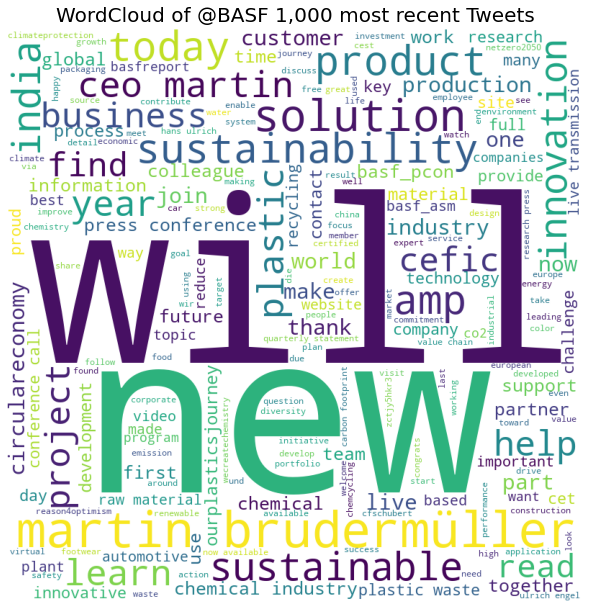

In [94]:
# Create a WordCloud using BASFs' Twitter timeline.  

# Define stopwords; words to exclude from the visualization
stopwords = set(STOPWORDS) | set(["rt","https","http","basf"])
#stopwords.update(["will","new"]) #adding our own stopwords
comment_words = ''

# iterate through the list of tweets
for val in basf_tweets:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

# Create WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                regexp = r"\w{3,}"
                ).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("WordCloud of @{} 1,000 most recent Tweets".format(basf_account.data.username),fontdict={"fontsize":20})

plt.show()

## Topic Modeling

In [ ]:
# TOPIC MODELLING PACKAGES
! pip install git+https://github.com/bmabey/pyLDAvis/ --upgrade
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

In [97]:
# Search for, collect, and organize up to 5,000 tweets
tweet_search = tweepy.Paginator(
        method = client.search_recent_tweets,
        query="basf lang:en -is:retweet", # keyword search
        max_results=100, # number of results per page
        ).flatten(limit=5000) # max number of results to collect

tweets_text = []

for k in tweet_search:
  tweets_text.append(k.data["text"])

In [98]:
# Check how many tweets have been collected
len(tweets_text)

753

In [99]:
# Preview the first 5 tweets
tweets_text[:5]

["@D_Blanchflower But it won't....\nLook at BASF...\nGerman company.",
 'Sealing Coating Market Outlook by 2029 | BASF, Alumasc Exterior Building Products, BB Fabrication Renaulac, Koster. – PRIZM News - PRIZM News https://t.co/hDuLGktAvn',
 "@UltraSneeze @zerohedge BASF is the largest chemical company in the world with 500.000 workers only in Germany. But today they going to China because they can't produce products without cheap Russian energy and resources.",
 'BASF . Owned .',
 '@Empty_America And people think it’s no big deal BASF may shut down some of its production. We will see hard times starting next year.']

In [ ]:
# Process all tweets, tokenize, filter, and create an LDA model using the Gensim package.

tweets_tokens = [t.lower().replace("'","").split() for t in tweets_text]
tweets_tokens = [[token for token in tweet if len(token) > 3] for tweet in tweets_tokens]

dictionary = gensim.corpora.Dictionary(tweets_tokens)
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tweets_tokens]

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                   id2word=dictionary,
                   num_topics=50, 
                   random_state=0,
                   chunksize=100,
                   per_word_topics=True,)

In [101]:
# Create a dashboard visualization of the LDA model using the pyLDAvis package

vis = pyLDAvis.gensim_models.prepare(
        topic_model = lda_model,
        corpus = corpus,
        dictionary = dictionary
)

pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


#Preparation for Sentiment Analysis


In [102]:
#Drop features
search_df = search_df.drop(['edit_history_tweet_ids', 'id'], axis=1)

In [103]:
search_df.head()

,text
0,"Sealing Coating Market Outlook by 2029 | BASF,..."
1,BASF . Owned .
2,BASF launches first biomass balance automotive...
3,NewswireToday / BASF Launches First Biomass Ba...
4,GPCA 2022: BASF chairman says Green Deal likel...


In [104]:
search_df.shape

(100, 1)

In [109]:
#Save as CSV
from google.colab import files
search_df.to_csv("tweets.csv")
files.download('tweets.csv')
#search_df.to_csv("https://github.com/IvanWasNotAvailable/StockPricePrediction/")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The downloaded is manually safed to the GitHubRepository.

In [ ]:
"https://raw.githubusercontent.com/IvanWasNotAvailable/StockPricePrediction/main/tweets.csv"

In [110]:
df = pd.read_csv("https://raw.githubusercontent.com/IvanWasNotAvailable/StockPricePrediction/main/tweets.csv", nrows=10)
df.head()

,Unnamed: 0,text
0,0,"Sealing Coating Market Outlook by 2029 | BASF,..."
1,1,BASF . Owned .
2,2,BASF launches first biomass balance automotive...
3,3,NewswireToday / BASF Launches First Biomass Ba...
4,4,GPCA 2022: BASF chairman says Green Deal likel...


In [111]:
search_df.shape

(100, 1)